### Importing Libraries

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Cleaning Dataset

In [2]:
loan = pd.read_csv('loan_dataset.csv')

In [3]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [5]:
loan = loan.dropna()

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 1 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            769 non-null    object 
 1   Gender             769 non-null    object 
 2   Married            769 non-null    object 
 3   Dependents         769 non-null    object 
 4   Education          769 non-null    object 
 5   Self_Employed      769 non-null    object 
 6   ApplicantIncome    769 non-null    int64  
 7   CoapplicantIncome  769 non-null    float64
 8   LoanAmount         769 non-null    float64
 9   Loan_Amount_Term   769 non-null    float64
 10  Credit_History     769 non-null    float64
 11  Property_Area      769 non-null    object 
 12  Loan_Status        769 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 84.1+ KB


### Feature Engineering

In [7]:
loan = loan.replace(to_replace='3+', value=4)

In [8]:
loan_df = loan.drop(columns=['Loan_ID'])

In [9]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

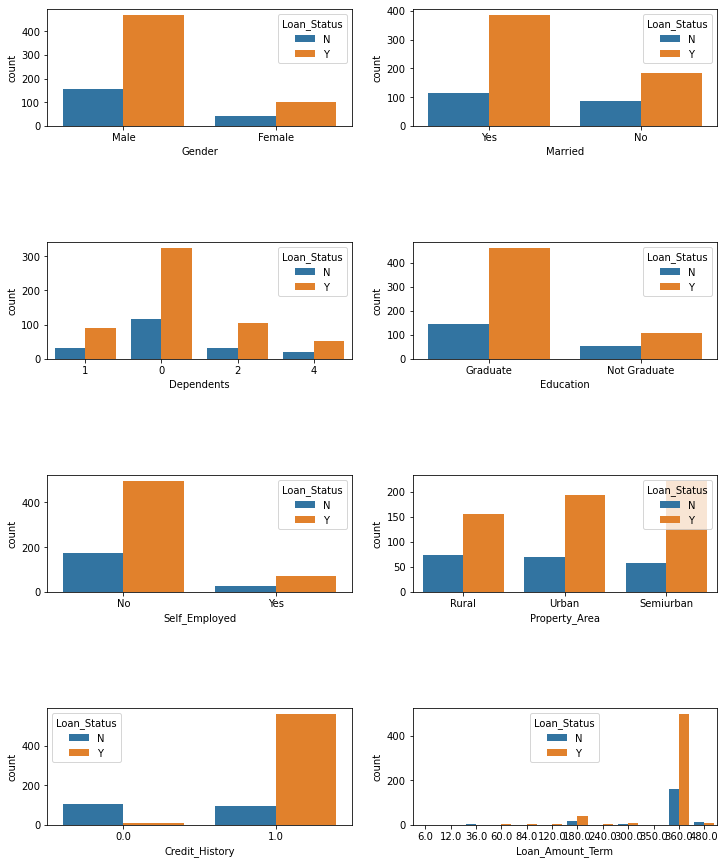

In [10]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       769.000000         769.000000  769.000000
mean       5091.061118        1561.239168  141.750325
std        5363.714294        2528.694435   73.442988
min           0.000000           0.000000    9.000000
25%        2895.000000           0.000000  100.000000
50%        3850.000000        1032.000000  128.000000
75%        5532.000000        2333.000000  163.000000
max       81000.000000       33837.000000  600.000000


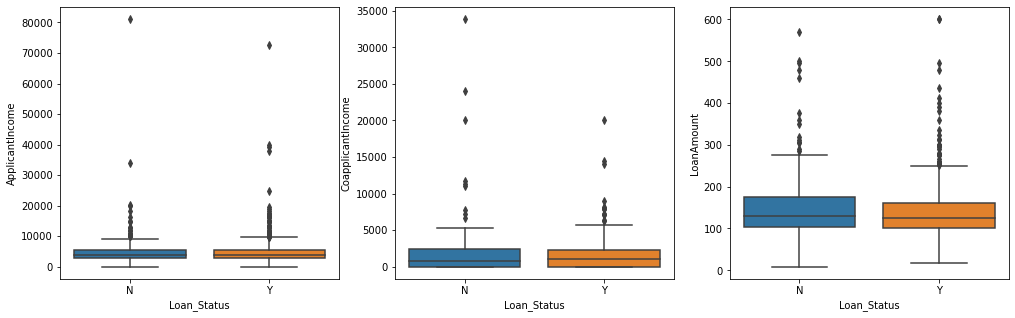

In [11]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan_df,x='Loan_Status',ax=axes[idx])

print(loan_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

C:\Users\pccom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

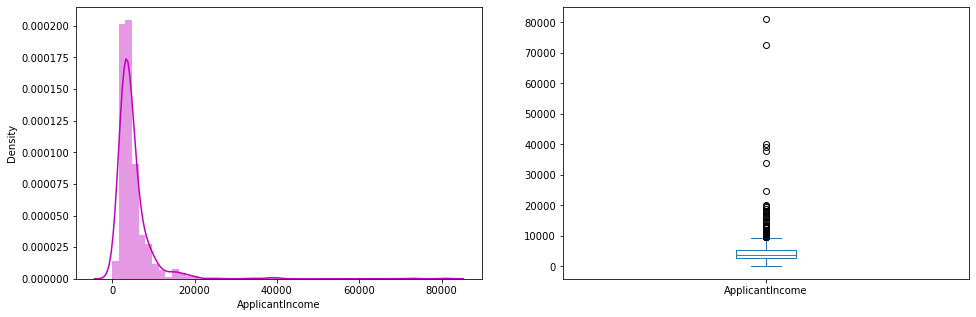

In [12]:
# Visualization of ApplicantIncome Variable (Numerical)

plt.figure(figsize = (20,10))

plt.subplot(121) 
sns.distplot(loan_df['ApplicantIncome'],color="m", ) 

plt.subplot(122) 
loan_df['ApplicantIncome'].plot.box(figsize=(16,5)) 

C:\Users\pccom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

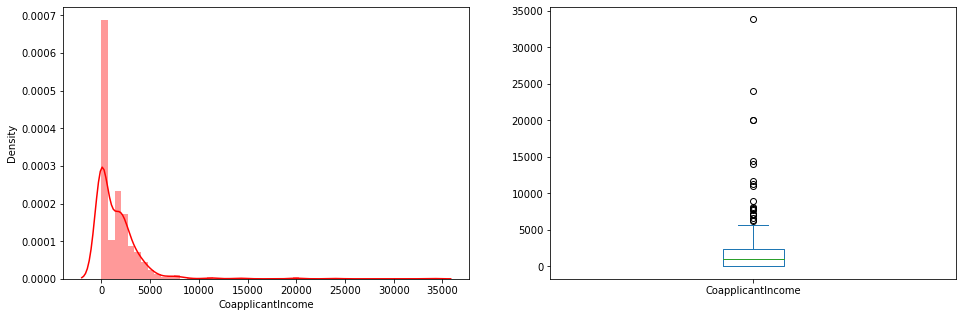

In [13]:
# Visualization of CoapplicantIncome Variable (Numerical)

plt.figure(figsize = (20,10))

plt.subplot(121) 
sns.distplot(loan_df['CoapplicantIncome'],color="r", ) 

plt.subplot(122) 
loan_df['CoapplicantIncome'].plot.box(figsize=(16,5)) 

C:\Users\pccom\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

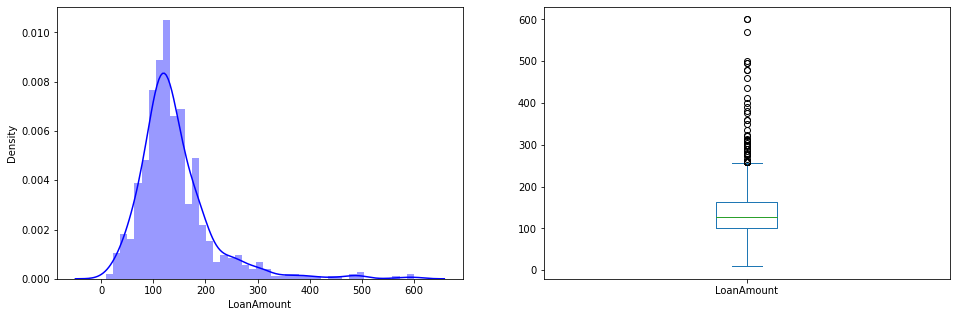

In [14]:
plt.figure(figsize = (20,10))

plt.subplot(121) 
sns.distplot(loan_df['LoanAmount'],color="b", ) 

plt.subplot(122) 
loan_df['LoanAmount'].plot.box(figsize=(16,5)) 

In [15]:
loan['LoanAmount_log'] = np.log(loan['LoanAmount']) 


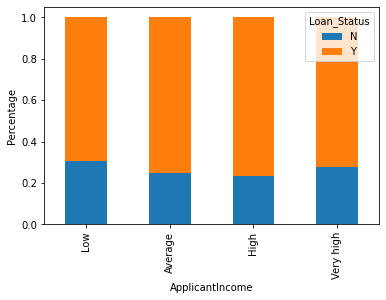

In [16]:
# Visualization of ApplicantIncome vs Loan_Status

bins=[0,2500,4000,6000,81000] 

group=['Low','Average','High', 'Very high'] 

loan_df['Income_bin']=pd.cut(loan_df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(loan_df['Income_bin'],loan_df['Loan_Status']) 

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('ApplicantIncome') 

P = plt.ylabel('Percentage')


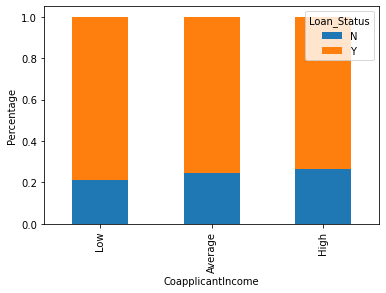

In [17]:
# Visualization of CoapplicantIncome vs Loan_Status

bins=[0,1000,3000,42000] 

group=['Low','Average','High'] 

loan_df['Coapplicant_Income_bin']=pd.cut(loan_df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(loan_df['Coapplicant_Income_bin'],loan_df['Loan_Status']) 

Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('CoapplicantIncome') 

P = plt.ylabel('Percentage')

Text(0.5, 0, 'Total_Income')

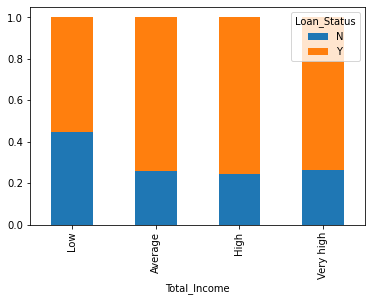

In [18]:
# Visualization of Total_Income vs Loan_Status

loan_df['Total_Income']=loan_df['ApplicantIncome']+loan_df['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 

group=['Low','Average','High', 'Very high'] 

loan_df['Total_Income_bin']=pd.cut(loan_df['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(loan_df['Total_Income_bin'],loan_df['Loan_Status']) 

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

plt.xlabel('Total_Income') 

In [19]:
x = loan.drop(columns=['Loan_ID','Loan_Status','Gender','Married'],axis=1)
y = loan['Loan_Status']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 615 to 867
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         615 non-null    object 
 1   Education          615 non-null    object 
 2   Self_Employed      615 non-null    object 
 3   ApplicantIncome    615 non-null    int64  
 4   CoapplicantIncome  615 non-null    float64
 5   LoanAmount         615 non-null    float64
 6   Loan_Amount_Term   615 non-null    float64
 7   Credit_History     615 non-null    float64
 8   Property_Area      615 non-null    object 
 9   LoanAmount_log     615 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 52.9+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[('Education',OrdinalEncoder(categories=[['Not Graduate','Graduate']]),['Education']),
                                ('Self_Employed',OrdinalEncoder(categories=[['Yes','No']]),['Self_Employed']),
                                ('Property_Area',OrdinalEncoder(categories=[['Rural','Semiurban','Urban']]),['Property_Area']),
                                ],remainder='passthrough')
x_train_trans = transformer.fit_transform(x_train)
x_test_trans= transformer.transform(x_test)
    

In [24]:
x_train_trans = pd.DataFrame(x_train_trans, columns=x_train.columns)
x_test_trans = pd.DataFrame(x_test_trans, columns=x_test.columns)

In [25]:
x_train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dependents         615 non-null    object
 1   Education          615 non-null    object
 2   Self_Employed      615 non-null    object
 3   ApplicantIncome    615 non-null    object
 4   CoapplicantIncome  615 non-null    object
 5   LoanAmount         615 non-null    object
 6   Loan_Amount_Term   615 non-null    object
 7   Credit_History     615 non-null    object
 8   Property_Area      615 non-null    object
 9   LoanAmount_log     615 non-null    object
dtypes: object(10)
memory usage: 48.2+ KB


In [26]:
x_train_d = x_train_trans.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)
x_test_d= x_test_trans.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

In [27]:
x_train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dependents      615 non-null    object
 1   Education       615 non-null    object
 2   Self_Employed   615 non-null    object
 3   Credit_History  615 non-null    object
 4   Property_Area   615 non-null    object
 5   LoanAmount_log  615 non-null    object
dtypes: object(6)
memory usage: 29.0+ KB


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train_trans[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
x_test_scaled = ss.transform(x_test_trans[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])


In [29]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
x_test_scaled = pd.DataFrame(x_test_scaled,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])


In [30]:
x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    615 non-null    float64
 1   CoapplicantIncome  615 non-null    float64
 2   LoanAmount         615 non-null    float64
 3   Loan_Amount_Term   615 non-null    float64
dtypes: float64(4)
memory usage: 19.3 KB


In [31]:
x_train_new = pd.concat([x_train_d,x_train_scaled],axis=1)
x_test_new = pd.concat([x_test_d,x_test_scaled],axis=1)

In [32]:
x_train_new

,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1.0,2.0,360.0,1.0,4.836282,0.100666,-0.488048,-0.024195,-0.201428
1,0.0,1.0,0.0,360.0,1.0,4.727388,0.904683,-0.694143,-0.587992,-0.379276
2,1.0,1.0,1.0,360.0,1.0,4.787492,0.904683,-0.321875,-0.587992,-0.283512
3,0.0,1.0,2.0,360.0,1.0,4.905275,0.100666,-0.378130,-0.180931,-0.078302
4,1.0,1.0,1.0,360.0,1.0,4.89784,-0.703352,-0.751435,0.242293,-0.091983
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,1.0,360.0,1.0,5.023881,-0.703352,-0.248510,0.414439,0.154269
611,0.0,1.0,2.0,180.0,1.0,4.919981,0.100666,0.427586,-0.587992,-0.050941
612,1.0,1.0,1.0,360.0,1.0,5.459586,0.904683,1.090980,-0.587992,1.289762
613,1.0,1.0,1.0,360.0,1.0,4.941642,-0.703352,-0.378130,0.633568,-0.009899


In [33]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x_train_new = rs.fit_transform(x_train_new)
x_test_new = rs.transform(x_test_new)

### Building a Model

In [34]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear',random_state=0, probability = True)
classifier.fit(x_train_new,y_train)


SVC(kernel='linear', probability=True, random_state=0)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
y_pred = classifier.predict(x_test_new)
svm_accuracy = accuracy_score(y_test,y_pred)
svm_confusionmatrix = confusion_matrix(y_test,y_pred)
svm_precisionscore = precision_score(y_test,y_pred)
print(svm_accuracy)
print(svm_confusionmatrix)
print(svm_precisionscore)

0.8831168831168831
[[ 30  13]
 [  5 106]]
0.8907563025210085


In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train_new, y_train, cv=10, scoring='accuracy').mean()
scores

0.863590692755156

In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
nb1 = GaussianNB()
nb2 = BernoulliNB()
nb1.fit(x_train_new,y_train)
y_pred1 = nb1.predict(x_test_new)
nb1_accuracy = accuracy_score(y_test,y_pred1)
nb1_confusionmatrix = confusion_matrix(y_test,y_pred1)
nb1_precisionscore = precision_score(y_test,y_pred1)
print(nb1_accuracy)
print(nb1_confusionmatrix)
print(nb1_precisionscore)

0.8441558441558441
[[ 30  13]
 [ 11 100]]
0.8849557522123894


In [38]:
nb2.fit(x_train_new,y_train)
y_pred2 = nb2.predict(x_test_new)
nb2_accuracy = accuracy_score(y_test,y_pred2)
nb2_confusionmatrix = confusion_matrix(y_test,y_pred2)
nb2_precisionscore = precision_score(y_test,y_pred2)
print(nb1_accuracy)
print(nb1_confusionmatrix)
print(nb1_precisionscore)

0.8441558441558441
[[ 30  13]
 [ 11 100]]
0.8849557522123894


In [39]:
from sklearn.ensemble import VotingClassifier
classifier1 = svm.SVC(probability = True)
vcf = VotingClassifier(estimators=[('svm', classifier1), ('gnb', nb1), ('bnb', nb2)], voting='hard')
vcf = vcf.fit(x_train_new, y_train)
vcf

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('gnb', GaussianNB()), ('bnb', BernoulliNB())])

In [40]:
y_pred3 = vcf.predict(x_test_new)
vcf_accuracy = accuracy_score(y_test,y_pred3)
vcf_confusionmatrix = confusion_matrix(y_test,y_pred3)
vcf_precisionscore = precision_score(y_test,y_pred3)
print(vcf_accuracy)
print(vcf_confusionmatrix)
print(vcf_precisionscore)

0.7207792207792207
[[  2  41]
 [  2 109]]
0.7266666666666667
